<a href="https://colab.research.google.com/github/MiraFinkel/marl_transforms/blob/master/RLTransformsMultiTaxiEnv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import HTML, Math
display(HTML("<script src='https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/"
             "latest.js?config=default'></script>"))

# Reinforcement Learning Transforms
*Author: Mira Finkelstein*

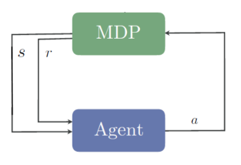

##### **Markov Decision Process (MDP)**
MDPs are a classical formalization of sequential decision-making, where actions influence immediate rewards and subsequent situations or states, and through those future rewards. MDPs are a mathematically idealized form of the reinforcement learning problem for which precise theoretical statements can be made.  An MDP defined as a five tuple $\left<\mathcal{S, A, R, P}, \gamma \right>$. Where:

*   $\mathcal{S}$ is a finite set of states
*   $\mathcal{A}$ is finite set of actions
*   $\mathcal{R:S}\times \mathcal{A} \rightarrow [0,\mathcal{R}_{max}]$ is a reward function
*   $\mathcal{P:S}\times \mathcal{A} \rightarrow \mathbb{P}[\mathcal{S}]$ is a transition function denoting a probability distribution over next states given a previous state and action.
*   $\gamma \in [0, 1]$ is a discount factor, symbolizing how much the agent favors short-term to long-term rewards.

The solution to an MDP is a policy, indicated $\pi:\mathcal{S} \rightarrow \mathbb{P}[\mathcal{A}]$ designating an action selection procedure. The agent's goal is to take action (i.e., calculate policy) that maximizes the long-term expected rewards.



##### **Taxi Environment**

The full description of the Multi-Taxi environment you can find [here](https://colab.research.google.com/drive/1mgWCaW5xvAyeXLgURtqfmIAM19yadk6W?authuser=1#scrollTo=xzNteZIEUGCh).

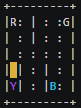

## Single Agent
Let's consider a case where we have a single agent. Its purpose is to take all passengers to their destinations. We will first model the problem as an MDP problem:
*   $s\in\mathcal{S}$ is represented as 
`
[taxi location], [current_fuel], [passengers_start_locations], [destinations], [passengers_status]
`
*   $a\in\mathcal{A}$ is on of 
`
{0: 'south',
 1: 'north',
 2: 'east',
 3: 'west',
 4: 'pickup',
 5: 'dropoff',
 6: 'turn_engine_on',
 7: 'turn_engine_off',
 8: 'standby',
 9: 'refuel'}
 `
*   $\mathcal{R}$ is a reward function
*   $\mathcal{P}$ is a transition function denoting a probability distribution over next states given a previous state and action.
*   $\gamma \in [0, 1]$ is a discount factor, symbolizing how much the agent favors short-term to long-term rewards.





### Initialization

We will use RLlib for the algorithms, so let's install it and clone the project:

In [ ]:
!pip install 'ray[rllib]'
!pip install --upgrade tensorflow
!git clone https://github.com/MiraFinkel/marl.git
%cd marl
%matplotlib inline

     |████████████████████████████████| 48.5MB 88kB/s 
     |████████████████████████████████| 204kB 44.5MB/s 
     |████████████████████████████████| 81kB 9.4MB/s 
     |████████████████████████████████| 81kB 9.2MB/s 
     |████████████████████████████████| 3.2MB 40.6MB/s 
     |████████████████████████████████| 1.3MB 49.0MB/s 
     |████████████████████████████████| 133kB 33.6MB/s 
     |████████████████████████████████| 71kB 7.9MB/s 
     |████████████████████████████████| 36.4MB 129kB/s 
     |████████████████████████████████| 317kB 42.6MB/s 
     |████████████████████████████████| 1.8MB 39.7MB/s 
     |████████████████████████████████| 143kB 48.1MB/s 
     |████████████████████████████████| 296kB 51.2MB/s 
     |████████████████████████████████| 61kB 6.4MB/s 
     |████████████████████████████████| 102kB 9.9MB/s 
  Created wheel for gpustat: filename=gpustat-0.6.0-cp36-none-any.whl size=12622 sha256=ff457a97c6f6c16b7a6c688e7b19b42b0e71b16e6b9e1731024d4d3cdfc85236
  Stored in direc

Import the relevant files:

In [ ]:
from utils import *
from visualize import *
import Environments.MultiTaxiEnv.multitaxienv.taxi_environment as taxi_env

Instructions for updating:
non-resource variables are not supported in the long term


### Training
#### Hyper-Parameters of the Class
You can choose an RL agent (from RLlib) from this list:

1. A2C
2. A3C
3. BC
4. DQN
5. APEX_DQN
6. IMPALA
7. MARWIL
8. PG
9. PPO
10. APPO
11. SAC
12. LIN_UCB
13. LIN_TS

You can read the agent's description [here](https://docs.ray.io/en/master/rllib-algorithms.html)

Also, you can choose the number of training epochs: iteration_num

In [ ]:
env_name = TAXI # in the future there will be more environments
number_of_agents = 1
agent_name = A2C
epochs_num = 70

If you want to render while training, set the display to True: 

```
taxi_env.set_display(True)
```

Every epoch, there will be a print:


`
[epoch] mean reward: [reward], variance: [max reward - min reward], running time: [epoch length]
`

for example:

`9 mean reward: -1166.86, variance: 1095.00, running time: 273.93`


NUM_GPUS = default 0

WITH_DEBUG = default True


In [ ]:
taxi_env.set_display(False)
ray.shutdown()
ray.init(num_gpus=NUM_GPUS, local_mode=WITH_DEBUG)
episode_reward_mean = train(env_name, agent_name, epochs_num, number_of_agents, with_transform=False)

2021-02-11 07:18:51,202	INFO services.py:1173 -- View the Ray dashboard at http://127.0.0.1:8265
2021-02-11 07:18:56,789	WARNING util.py:43 -- Install gputil for GPU system monitoring.


  1 mean reward:    nan, variance:    nan, running time:    nan
  2 mean reward: -825.21, variance: 1183.00, running time: 246.09
  3 mean reward: -561.53, variance: 1348.00, running time: 217.43
  4 mean reward: -284.39, variance: 931.00, running time: 188.21
  5 mean reward: -95.96, variance: 359.00, running time: 163.75
  6 mean reward: -15.20, variance: 205.00, running time: 147.28
  7 mean reward:   8.47, variance: 134.00, running time: 141.29
  8 mean reward:  18.99, variance:  97.00, running time: 138.54
  9 mean reward:  21.62, variance: 127.00, running time: 137.91
 10 mean reward:  20.62, variance: 141.00, running time: 138.17
 11 mean reward:  26.57, variance: 101.00, running time: 135.19
 12 mean reward:  25.55, variance: 101.00, running time: 135.95
 13 mean reward:  27.69, variance: 102.00, running time: 135.55
 14 mean reward:  27.01, variance:  92.00, running time: 135.85
 15 mean reward:  27.09, variance:  85.00, running time: 135.72
 16 mean reward:  28.52, variance: 

### Evaluation
The evaluation function activates the agents in the environment based on the policy they learned during the training phase.

In [ ]:
taxi_env.set_display(True)
evaluate(number_of_agents)
ray.shutdown()


 ================ STARTING EVALUATION ================ 

0


### Visualization


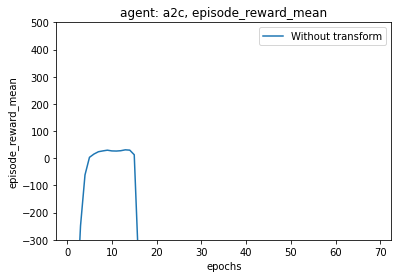

In [ ]:
# plots a graph with the episode reward mean
plot_result_graph(agent_name, [episode_reward_mean], ["Without transform"], "episode_reward_mean")

### Example



In [ ]:
ray.shutdown()
# set the parameters
taxi_env.set_display(False)
env_name = TAXI
number_of_agents = 1
agent_name = A2C
iteration_num = 25
reduction_indexis = [FUELS_IDX]

ray.init(num_gpus=NUM_GPUS, local_mode=WITH_DEBUG)

# Training
episode_reward_mean = train(env_name, agent_name, iteration_num, number_of_agents) # without transform
taxi_env.set_display(True)
evaluate(number_of_agents)



2021-02-11 06:28:11,543	INFO services.py:1173 -- View the Ray dashboard at http://127.0.0.1:8265
2021-02-11 06:28:15,308	INFO trainer.py:591 -- Tip: set framework=tfe or the --eager flag to enable TensorFlow eager execution
2021-02-11 06:28:15,309	INFO trainer.py:618 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
2021-02-11 06:28:17,142	WARNING util.py:43 -- Install gputil for GPU system monitoring.
2021-02-11 06:28:17,150	WARNING deprecation.py:30 -- DeprecationWarning: `env_index` has been deprecated. Use `episode.env_id` instead. This will raise an error in the future!


Streaming output truncated to the last 5000 lines.
+-------+
  (pickup)
Taxi1-YELLOW: Fuel: 8, Location: (1,0), Collided: False
Passenger1: Location: (0, 3), Destination: (3, 3)
Passenger2: Location: (2, 1), Destination: (3, 3)
Done: False, {'taxi_1': False, '__all__': False}
Passengers Status's: [2, 2]
+-------+
|X: |F:X|
|_: | : |
| : : : |
|X| :G|X|
+-------+
  (pickup)
Taxi1-YELLOW: Fuel: 8, Location: (1,0), Collided: False
Passenger1: Location: (0, 3), Destination: (3, 3)
Passenger2: Location: (2, 1), Destination: (3, 3)
Done: False, {'taxi_1': False, '__all__': False}
Passengers Status's: [2, 2]
+-------+
|X: |F:X|
|_: | : |
| : : : |
|X| :G|X|
+-------+
  (dropoff)
Taxi1-YELLOW: Fuel: 8, Location: (1,0), Collided: False
Passenger1: Location: (0, 3), Destination: (3, 3)
Passenger2: Location: (2, 1), Destination: (3, 3)
Done: False, {'taxi_1': False, '__all__': False}
Passengers Status's: [2, 2]
+-------+
|X: |F:X|
|_: | : |
| : : : |
|X| :G|X|
+-------+
  (bind)
Taxi1-YELLOW: Fue

In [ ]:
taxi_env.set_display(False)
episode_reward_mean_transform = train(env_name, agent_name, 
                                      iteration_num, 
                                      number_of_agents,
                                      with_transform=True,
                                      transform_idxes=reduction_indexis) # with fuel reduction transform
taxi_env.set_display(True)
evaluate(number_of_agents)
ray.shutdown()

2021-02-11 06:37:45,171	WARNING util.py:43 -- Install gputil for GPU system monitoring.


  1 mean reward:    nan, variance:    nan, running time:    nan
  2 mean reward: -888.15, variance: 1196.00, running time: 250.70
  3 mean reward: -585.95, variance: 1471.00, running time: 218.99
  4 mean reward: -254.30, variance: 1028.00, running time: 181.57
  5 mean reward: -69.63, variance: 387.00, running time: 157.93
  6 mean reward:  -7.23, variance: 262.00, running time: 144.81
  7 mean reward:  17.42, variance: 132.00, running time: 138.23
  8 mean reward:  24.18, variance: 109.00, running time: 136.24
  9 mean reward:  24.30, variance: 133.00, running time: 137.05
 10 mean reward:  27.15, variance: 120.00, running time: 135.83
 11 mean reward:  30.30, variance:  96.00, running time: 134.40
 12 mean reward:  31.45, variance:  99.00, running time: 133.50
 13 mean reward:  29.77, variance: 106.00, running time: 134.29
 14 mean reward:  30.58, variance: 124.00, running time: 134.56
 15 mean reward:  27.77, variance: 105.00, running time: 135.73
 16 mean reward:  28.08, variance:

In [ ]:
ray.shutdown()
# set the parameters
taxi_env.set_display(False)
env_name = TAXI
number_of_agents = 1
agent_name = PG
iteration_num = 5000
reduction_indexis = [FUELS_IDX]

ray.init(num_gpus=NUM_GPUS, local_mode=WITH_DEBUG)

# Training
episode_reward_mean = train(env_name, agent_name, iteration_num, number_of_agents) # without transform
taxi_env.set_display(True)
evaluate(number_of_agents)

2021-02-11 06:57:11,240	INFO services.py:1173 -- View the Ray dashboard at http://127.0.0.1:8265
2021-02-11 06:57:16,135	WARNING util.py:43 -- Install gputil for GPU system monitoring.


Streaming output truncated to the last 5000 lines.
1207 mean reward:  79.29, variance:  52.00, running time: 109.94
1208 mean reward:  79.27, variance:  56.00, running time: 109.95
1209 mean reward:  79.37, variance:  56.00, running time: 109.90
1210 mean reward:  79.37, variance:  56.00, running time: 109.90
1211 mean reward:  79.06, variance:  63.00, running time: 109.99
1212 mean reward:  78.65, variance:  63.00, running time: 110.13
1213 mean reward:  78.54, variance:  63.00, running time: 110.25
1214 mean reward:  78.44, variance:  63.00, running time: 110.30
1215 mean reward:  78.46, variance:  63.00, running time: 110.29
1216 mean reward:  78.12, variance:  63.00, running time: 110.46
1217 mean reward:  78.10, variance:  63.00, running time: 110.47
1218 mean reward:  78.02, variance:  63.00, running time: 110.51
1219 mean reward:  77.76, variance:  63.00, running time: 110.64
1220 mean reward:  77.91, variance:  63.00, running time: 110.63
1221 mean reward:  77.44, variance:  63

In [ ]:
# Visualizing
plot_result_graph(agent_name, 
                  [episode_reward_mean, episode_reward_mean_transform], 
                  ["without transform", "with transform"], "episode_reward_mean")

#### Result
As you can see, the algorithm does a decent job until the ~13th iteration. Then its reward starts to go down. When we do not expose the agent to the taxi's fuel level, he does not experience a reward decrease. Therefore, it can be concluded that perhaps the explanation for the behavior of the decrease in reward stems from its exposure to the fuel level.

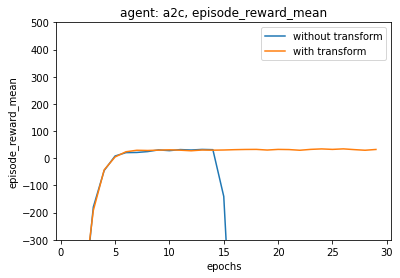

## Multi-agent
### Initialization
### Training
### Evaluation
### Visualization